In [3]:
import numpy as np
import pandas as pd
import nltk


In [5]:
df= pd.read_csv('spam.csv', encoding='latin-1')
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2209,ham,"Hmm well, night night",NaN,NaN,NaN
3005,ham,Also hi wesley how've you been,NaN,NaN,NaN
3123,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN
2279,ham,"Sorry, I'll call later in meeting",NaN,NaN,NaN
353,ham,Yo you guys ever figure out how much we need f...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

Data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.drop(columns=['Unnamed: 2 ','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
403,ham,None of that's happening til you get here though
1664,ham,ÌÏ v ma fan...
2654,ham,Its sarcasm.. .nt scarcasim
716,spam,+449071512431 URGENT! This is the 2nd attempt ...
387,ham,Mm that time you dont like fun


In [21]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [22]:
df.sample(5)

,target,text
547,ham,"Sorry that took so long, omw now"
3376,ham,Yup. Wun believe wat? U really neva c e msg i ...
5189,spam,ree entry in 2 a weekly comp for a chance to w...
261,ham,Anyway i'm going shopping on my own now. Cos m...
5174,ham,Water logging in desert. Geoenvironmental impl...


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df['target']= encoder.fit_transform(df['target'])

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [34]:
df = df.drop_duplicates(keep='first')

In [36]:
df.shape

(5169, 2)

In [37]:
#EDA

In [38]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

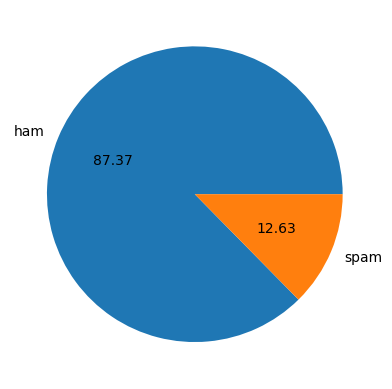

In [42]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [71]:
import nltk
!pip install nltk

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Surjit
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
df['num_characters']= df['text'].apply(len)

C:\Users\Surjit Singh\AppData\Local\Temp\ipykernel_2860\3630017924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [74]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
#num of words

In [78]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Surjit Singh\AppData\Local\Temp\ipykernel_2860\3620582556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [84]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Surjit Singh\AppData\Local\Temp\ipykernel_2860\4096368533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [85]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [86]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [87]:
df[df['target']== 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [98]:
df[df['target']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [99]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

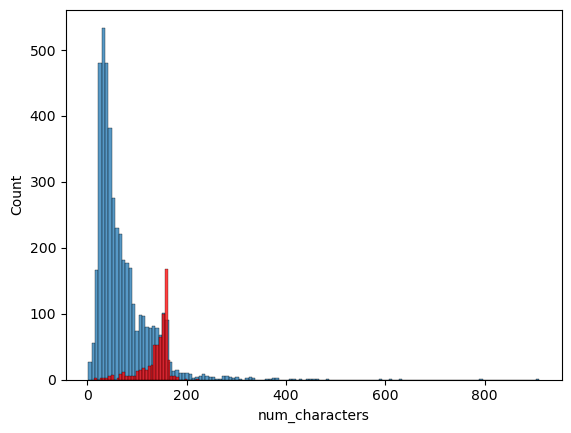

In [100]:

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

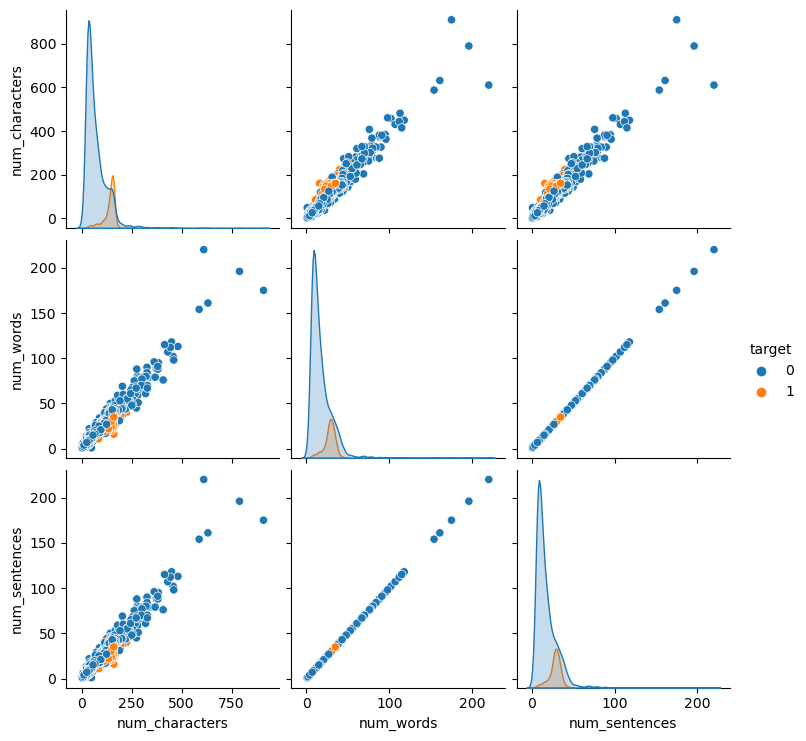

In [101]:
sns.pairplot(df,hue='target')

C:\Users\Surjit Singh\AppData\Local\Temp\ipykernel_2860\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

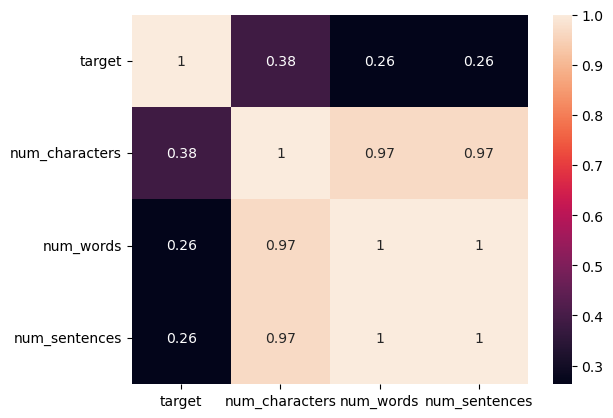

In [103]:
sns.heatmap(df.corr(),annot=True)

### 3. Data preprocessing

In [151]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [152]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [153]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [156]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Surjit Singh\AppData\Local\Temp\ipykernel_2860\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [157]:
transform_text("I m gonna be home soon and i don't want to talk about this stuff anymore tonight , k? i 've crued enough today' ")

'gon na home soon want talk stuff anymor tonight k cru enough today'

In [158]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Surjit Singh\AppData\Local\Temp\ipykernel_2860\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [159]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [163]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 328.2 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 328.2 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 328.2 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 328.2 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 328.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 288.8 kB/s eta 0:00:01
   ----------

In [166]:
spam_wc= wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

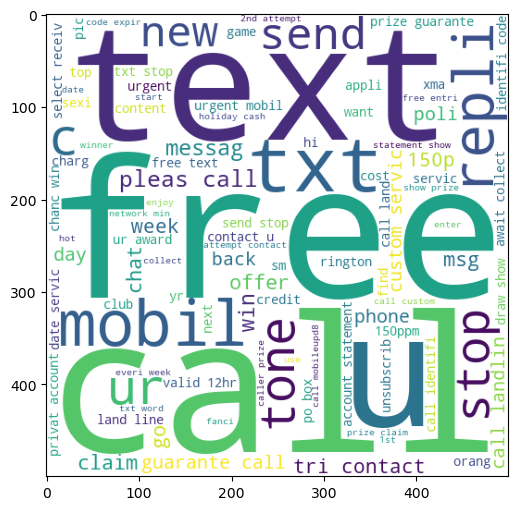

In [168]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [169]:
ham_wc= wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

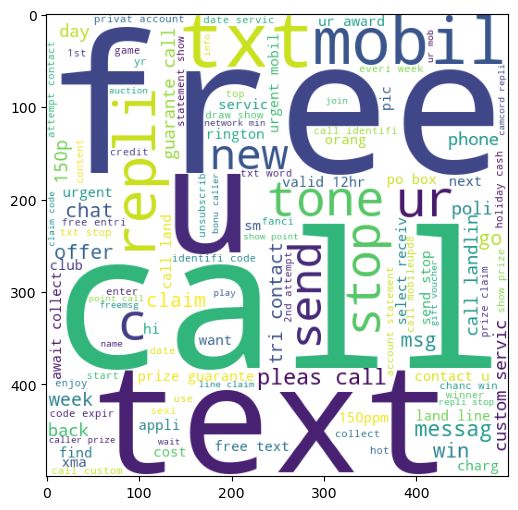

In [170]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [171]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [270]:
spam_corpus = []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [271]:
len(spam_corpus)

9939

In [272]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [197]:
ham_corpus = []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [199]:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

KeyError: 0

Model Building

In [327]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [328]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [329]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [330]:
##from sklearn.preprocessing import MinMaxScaler
##scaler = MinMaxScaler()
#x = scaler.fit_transform(X)

In [331]:
x.shape

(5169, 3000)

In [332]:
y = df['target'].values

In [333]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [336]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [337]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [338]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [339]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [340]:
#tfidf --> mnb

In [341]:
#model imorove
#change the max_feature 

In [342]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))